In [1]:
# import the necessary packages
from collections import namedtuple
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
# specify the path to the EM-DAT dataset
emdat_dataset_path = os.path.join(
    "natural-disasters-data",
    "em-dat",
    "EMDAT_1900-2021_NatDis.csv"
)

# load the EM-DAT natural disasters dataset from disk
df = pd.read_csv(emdat_dataset_path)
df.head()

,Dis No,Year,Seq,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Entry Criteria,...,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,1900-9002-CPV,1900,9002,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
1,1900-9001-IND,1900,9001,Natural,Climatological,Drought,Drought,NaN,NaN,NaN,...,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.261389
2,1902-0012-GTM,1902,12,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Kill,...,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,3.391845
3,1902-0003-GTM,1902,3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845
4,1902-0010-GTM,1902,10,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Kill,...,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.391845


In [3]:
def basic_eda(df):
    # count the number of duplicated rows, then grab all NaN (i.e., null) rows
    # in the dataframe
    num_duplicated = df.duplicated().sum()
    is_nan = df.isnull()
    
    # count the total number of rows that contain *at least one* null value
    num_null_rows = is_nan.any(axis=1).sum()
    
    # count the total number of null values across *all* rows and *all* columns
    # (i.e., a sum of a sum)
    num_total_null = df.isnull().sum().sum()

    # construct a named tuple to represent each row in the exploratory data
    # analysis summary
    EDARow = namedtuple("EDARow", ["Name", "Value", "Notes"])

    # build the list of exploratory data analysis rows
    rows = [
        EDARow("Samples", df.shape[0], ""),
        EDARow("Features", df.shape[1], ""),
        EDARow("Duplicate Rows", num_duplicated, ""),
        EDARow("Rows with NaN", num_null_rows, "{:.2f}% all rows".format(
            (num_null_rows / df.shape[0]) * 100)),
        EDARow("Total NaNs", num_total_null, "{:.2f}% feature matrix".format(
            (num_total_null / (df.shape[0] * df.shape[1])) * 100)),
    ]
        
    # build and return our exploratory data analysis dataframe
    return pd.DataFrame(rows, columns=["Name", "Value", "Notes"])

In [4]:
# perform a basic exploratory data analysis of the EM-DAT dataset
basic_eda(df)

,Name,Value,Notes
0,Samples,15827,
1,Features,43,
2,Duplicate Rows,0,
3,Rows with NaN,15827,100.00% all rows
4,Total NaNs,285923,42.01% feature matrix


In [5]:
def summarize_data(df):
    # initialize a summary dataframe consiting of the original dataframe's
    # column names and data types
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"])
    
    # reset the summary index, rename the "index" column to "Name", and then
    # remove the "index" column
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name", "dtypes"]]
    
    # count the number of (1) null values for each column, and (2) the unique
    # values in each column
    summary["Missing"] = df.isnull().sum().values
    summary["Uniques"] = df.nunique().values
    
    # return the summary dataframe
    return summary

In [6]:
# summarize the EM-DAT dataframe
summarize_data(df)

,Name,dtypes,Missing,Uniques
0,Dis No,object,0,15827
1,Year,int64,0,122
2,Seq,int64,0,1266
3,Disaster Group,object,0,1
4,Disaster Subgroup,object,0,6
5,Disaster Type,object,0,15
6,Disaster Subtype,object,2984,27
7,Disaster Subsubtype,object,14782,12
8,Event Name,object,12024,1532
9,Entry Criteria,object,335,13


In [7]:
def plot_null_columns(
    df,
    title,
    x_label="Feature Names",
    y_label="# of Null Values",
    figsize=(20, 5)
):
    # count the number of times a given column has a null value
    null_cols = df.isnull().sum().sort_values(ascending=False)
    
    # initialize the figure, set the tick information, and update the spines
    plt.figure(figsize=figsize)
    sns.set(style="ticks", font_scale=1)
    plt.xticks(rotation=90, fontsize=12)
    sns.despine(top=True, right=True, bottom=False, left=True)

    # plot the data
    ax = sns.barplot(x=null_cols.index, y=null_cols, palette="cool_r")

    # set the x-label, y-label, and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.title(title)

    # loop over the patches and null column counts
    for (p, count) in zip(ax.patches, null_cols):
        # compute the percentage of the number of rows that have a null value
        # for the current column
        ax.annotate(
            "{:.1f}%".format((count / df.shape[0]) * 100),
            (p.get_x() + (p.get_width() / 2.0), abs(p.get_height())),
            ha="center",
            va="bottom",
            rotation="vertical",
            color="black",
            xytext=(0, 10),
            textcoords="offset points"
        )

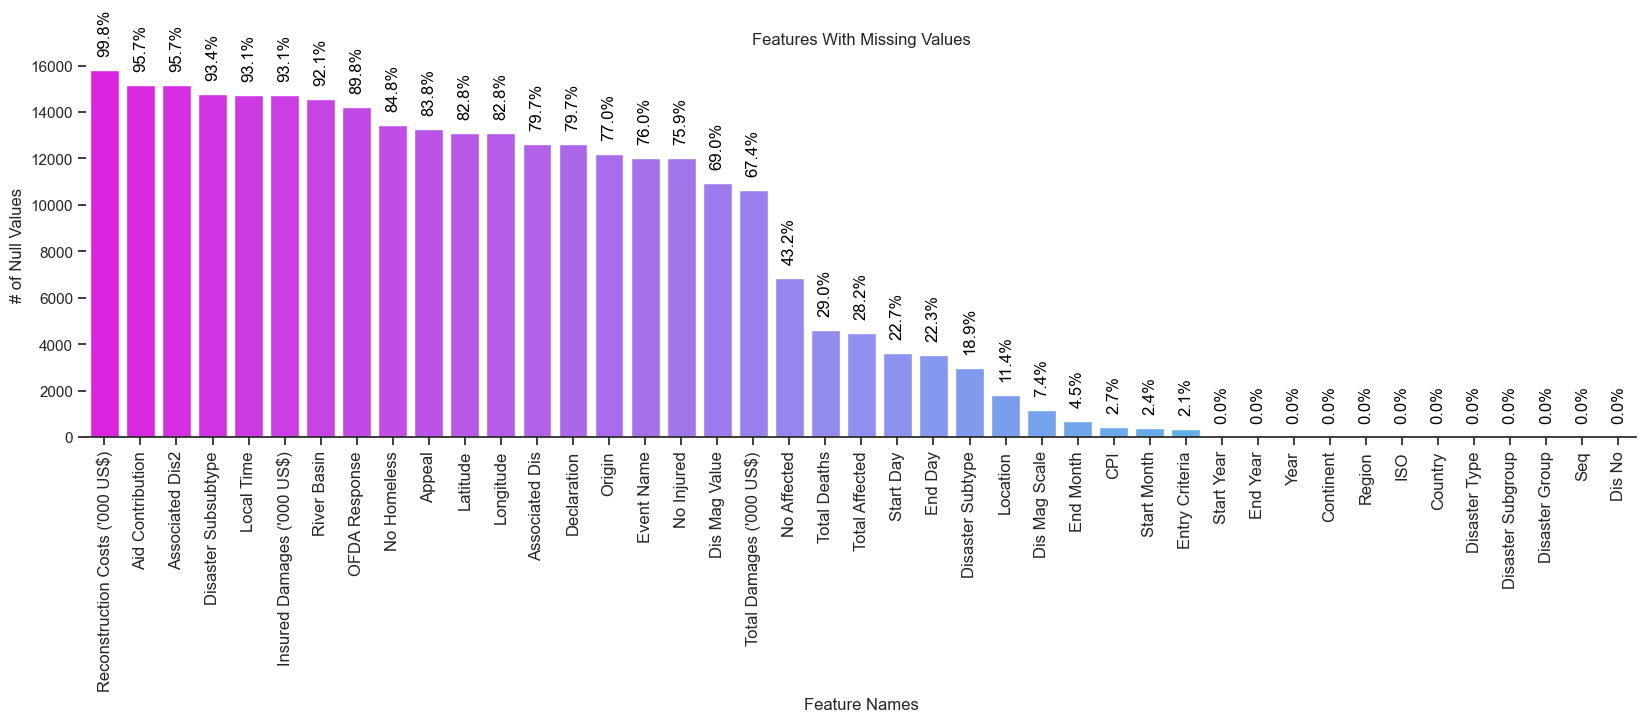

In [8]:
# plot the null column counts within the dataset
plot_null_columns(df, "Features With Missing Values")

In [9]:
# define the disaster type columns we are interested then
disaster_cols = [
    "Disaster Subgroup",
    "Disaster Type",
    "Disaster Subtype",
    "Disaster Subsubtype",
]

# grab the disaster data from the dataframe
disaster_df = df[disaster_cols]

# fill any null values with an empty string (implying that no subgroups or
# subtypes exist for the current value)
disaster_df = disaster_df.fillna(value={
    "Disaster Subtype": "NA",
    "Disaster Subsubtype": "NA",
})

# construct the final dataframe which displays a hierarchical overview of the
# disaster types, including the counts for each one
disaster_df = pd.DataFrame(
    disaster_df.groupby(disaster_cols).size().to_frame("count")
)
disaster_df

count
Disaster Subgroup Disaster Type         Disaster Subtype                 Disaster Subsubtype           
Biological        Animal accident       NA                               NA                           1
                  Epidemic              Bacterial disease                NA                         766
                                        NA                               NA                         141
                                        Parasitic disease                NA                          49
                                        Viral disease                    NA                         540
                  Insect infestation    Grasshopper                      NA                          16
                                        Locust                           NA                          62
                                        NA                               NA                          18
Climatological    Drought               Drought                          NA                         756
                                        NA                               NA                           1
                  Glacial lake outburst NA                               NA                           1
                  Wildfire              Forest fire                      NA                         303
                                        Land fire (Brush, Bush, Pasture) NA                         123
                                        NA                               NA                          29
Extra-terrestrial Impact                NA                               NA                           1
Geophysical       Earthquake            Ground movement                  NA                        1468
                                        NA                               NA                           3
                                        Tsunami                          NA                          57
                  Mass movement (dry)   Avalanche                        NA                           5
                                        Landslide                        Mudslide                     5
                                                                         NA                          27
                                        NA                               NA                           1
                                        Rockfall                         NA                           9
                                        Subsidence                       Sudden subsidence            1
                  Volcanic activity     Ash fall                         NA                         243
                                        Lava flow                        NA                           5
                                        NA                               NA                           7
                                        Pyroclastic flow                 NA                           1
Hydrological      Flood                 Coastal flood                    NA                          85
                                        Flash flood                      NA                         747
                                        NA                               NA                        1913
                                        Riverine flood                   NA                        2654
                  Landslide             Avalanche                        NA                         111
                                                                         Winter storm/Blizzard        2
                                        Landslide                        NA                         535
                                        Mudslide                         NA                          71
                                        NA                               NA                          44
                                        Ro